In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Load the data and do some quick analysis.

In [2]:
import pandas as pd
all_data = pd.read_csv('data_archive.zip')
all_data

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
106062,stay frustrate world life want take long nap w...,INFP
106063,fizzle around time mention sure mistake thing ...,INFP
106064,schedule modify hey w intp strong wing underst...,INFP
106065,enfj since january busy schedule able spend li...,INFP


In [3]:
all_data['type'].value_counts(normalize=False)

INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: type, dtype: int64

The dataset is heavily unbalanced. So, I decided to first attempt classification for the two most frequent classes only: INTJ and INTP.

In [4]:
# data = all_data[all_data['type'].isin(['INTP', 'INTJ'])]
num_records_of_each_type = 100
intp_data = all_data[all_data['type'].isin(['INTP'])].head(num_records_of_each_type)
intj_data = all_data[all_data['type'].isin(['INTJ'])].head(num_records_of_each_type)
data = pd.concat([intp_data, intj_data])
data
data['type'].value_counts()

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(data['posts'], data['type'], test_size=0.1)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

,posts,type
22427,watch bite everything include hentai tend enjo...,INTP
22428,like goal personally appeal probably wrong see...,INTP
22429,fill unfortunately read habit want learn prefe...,INTP
22430,people idea reason enjoy leadership role like ...,INTP
22431,state grievance ego lack skill find polarize w...,INTP
...,...,...
95,steal etc guarantee best resus like apply kant...,INTJ
96,th doctor would resolve matter explode burn lo...,INTJ
97,similar refinement sophistication efficacy met...,INTJ
98,grow safe home whatnot way shape form agree li...,INTJ


INTP    100
INTJ    100
Name: type, dtype: int64

Remember to stop your project once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/project#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
https://app.neptune.ai/tapadipti/mtbi/e/MTBI-65
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/3655081809295562', experiment_id='3655081809295562', lifecycle_stage='active', name='/Users/tapadipti@gmail.com/mtbi_personality_types', tags={'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'tapadipti@gmail.com',
 'mlflow.ownerId': '1845632268928146'}>

<ActiveRun: >

LogisticRegression()

              precision    recall  f1-score   support

        INTJ       0.86      0.60      0.71        10
        INTP       0.69      0.90      0.78        10

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.74        20
weighted avg       0.77      0.75      0.74        20



<Namespace field at "parameters">

<Float field at "accuracy">

ModelInfo(artifact_path='model', flavors={'python_function': {'model_path': 'model.pkl', 'loader_module': 'mlflow.sklearn', 'python_version': '3.9.5', 'env': 'conda.yaml'}, 'sklearn': {'pickled_model': 'model.pkl', 'sklearn_version': '1.0', 'serialization_format': 'cloudpickle'}}, model_uri='runs:/e16fb3fe7a1c45758c0a91df01cd61b3/model', model_uuid='1710069f4e6347858e71cf3a92851251', run_id='e16fb3fe7a1c45758c0a91df01cd61b3', saved_input_example_info=None, signature_dict=None, utc_time_created='2022-01-30 08:20:09.221382')

array([[6, 4],
       [1, 9]])

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 0, 'Predicted Types')

Text(0, 0.5, 'Actual Types')

[Text(0, 1, 'INTJ'), Text(1, 1, 'INTP')]

[Text(0, 0, 'INTJ'), Text(0, 1, 'INTP')]

Text(0, 0, '6')

Text(1, 0, '4')

Text(0, 1, '1')

Text(1, 1, '9')

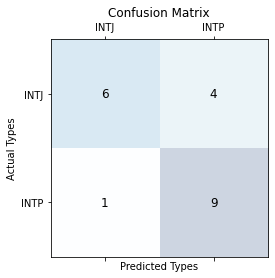

Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 4 operations to synchronize with Neptune. Do not kill this process.


All 4 operations synced, thanks for waiting!


In [30]:
import neptune.new as neptune
import mlflow
import sys, json

neptune_project = neptune.init_project(name="tapadipti/mtbi", api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2MWI2YzlkMS0zNjBlLTQ1NjEtYmUxNS05MDI1ZGMyNDA1ODAifQ==")

neptune_run = neptune.init(
    project="tapadipti/mtbi",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2MWI2YzlkMS0zNjBlLTQ1NjEtYmUxNS05MDI1ZGMyNDA1ODAifQ==",
    source_files=["mtbi_prediction_task.ipynb"]
)

mlflow.set_tracking_uri("databricks")
mlflow.set_experiment("/Users/tapadipti@gmail.com/mtbi_personality_types")
mlflow.sklearn.autolog(disable=True)
mlflow.start_run()

with open("params.json") as f:
    all_params = json.load(f)
params = all_params["lr"]

lr = LogisticRegression(**params)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

neptune_run["parameters"] = params
neptune_run["accuracy"] = accuracy

neptune_run["accuracy_log"].log(accuracy)

neptune_run["parameters"]
neptune_run["accuracy"]


mlflow.log_param("penalty", params["penalty"])
mlflow.log_metric("accuracy", accuracy)
# mlflow.log_metric("accuracy", accuracy+0.01)
# mlflow.log_metric("accuracy", accuracy+0.02)
from urllib.parse import urlparse
tracking_uri_scheme = urlparse(mlflow.get_tracking_uri()).scheme
# if tracking_uri_scheme != "file":
mlflow.sklearn.log_model(lr, "model")
# else:
#     mlflow.sklearn.log_model(lr, "model")


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

neptune_project["general/source_code"].upload("mtbi_prediction_task.ipynb")
neptune_project["dataset/v0.1"].track_files("./data_archive.zip")

neptune_run["notebook_code"].track_files("mtbi_prediction_task.ipynb")
neptune_run["train_dataset"].track_files("./data_archive.zip")


import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns

# ax = sns.heatmap(cm, cmap="Blues", annot=True, fmt="d")

# ax.set_title('Confusion Matrix');
# ax.set_xlabel('Predicted Type')
# ax.set_ylabel('Actual Type');

# ax.xaxis.set_ticklabels(['INTJ','INTP'])
# ax.yaxis.set_ticklabels(['INTJ','INTP'])

# plt.show()

fig, ax = plt.subplots()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Types')
plt.ylabel('Actual Types')

ax.matshow(cm, cmap="Blues", alpha=0.2)

mtbi_types = ['INTJ', 'INTP']
tick_positions = np.arange(len(mtbi_types))
ax.xaxis.set_ticks(tick_positions)
ax.xaxis.set_ticklabels(mtbi_types)
ax.yaxis.set_ticks(tick_positions)
ax.yaxis.set_ticklabels(mtbi_types)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')

plt.show()

neptune_run["confusion_matrix"].upload(fig)
neptune_run.stop()

mlflow.end_run()

In [22]:
mlflow.end_run()

In [6]:


# neptune_run["precision"] = {"INTJ": 0.92, "INTP": 0.92}
# neptune_run["recall"] = {"INTJ": 0.91, "INTP": 0.93}
# neptune_run["f1-score"] = {"INTJ": 0.91, "INTP": 0.93}


# neptune_project["general/brief"] = "URL_TO_PROJECT_BRIEF"

# project["dataset/latest"] = project["dataset/v0.1"].fetch()
# project = neptune.init_project("tapadipti/mtbi", mode="read-only")
# run["dataset"] = project["dataset/v0.1"].fetch()
# run["dataset"].download()



In [26]:
print(1)

1
